<a href="https://colab.research.google.com/github/omkarkulkarni2704/Omkar/blob/main/OMKAR_KULKARNI_(Data_Science_and_Business_Analytics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE SPARKS FOUNDATION 

Prediction Using Decision Tree Algorithm

Name : - Omkar Kulkarni




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("Iris.csv")

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.drop('Id', axis = 1, inplace = True)       #drop Id coln
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.isnull().sum()       #Checking null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.nunique()          #number of unique elements

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [ ]:
data.Species.value_counts()       #number of unique species

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
data.min()

SepalLengthCm            4.3
SepalWidthCm               2
PetalLengthCm              1
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [ ]:
data.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

#Visualization

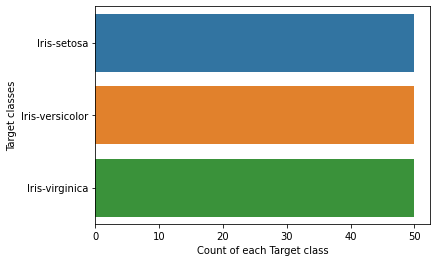

In [ ]:
# target Class Count
sns.countplot(y=data.Species ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

SepalLengthCm       AxesSubplot(0.125,0.657941;0.352273x0.222059)
SepalWidthCm     AxesSubplot(0.547727,0.657941;0.352273x0.222059)
PetalLengthCm       AxesSubplot(0.125,0.391471;0.352273x0.222059)
PetalWidthCm     AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

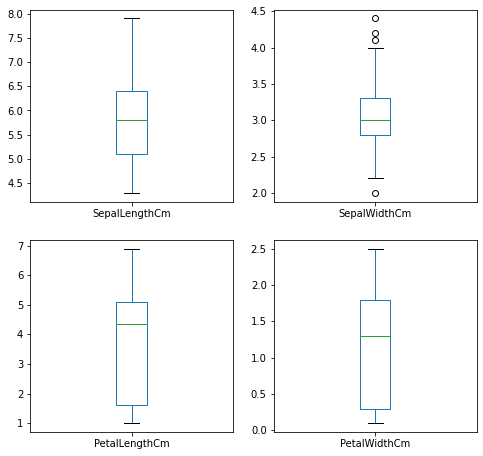

In [ ]:
data.plot(kind = 'box', subplots=True, layout = (3,2), figsize = (8,12))

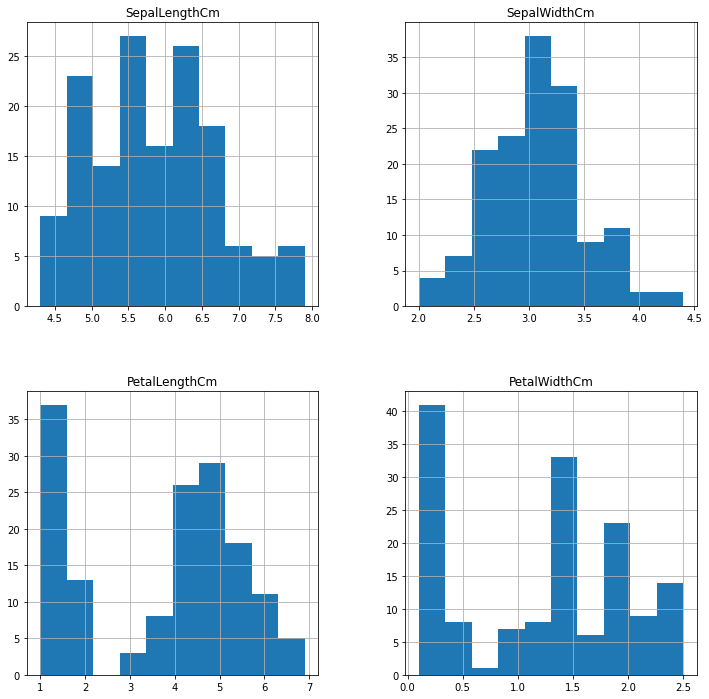

In [ ]:
data.hist(figsize=(12,12))
plt.show()

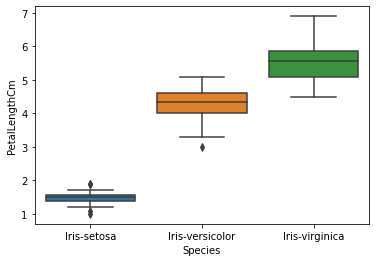

In [ ]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data=data)

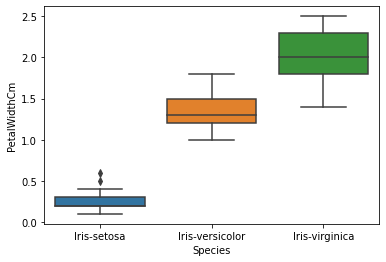

In [ ]:
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data=data)

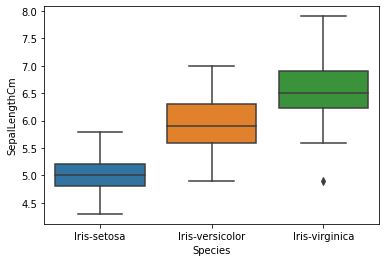

In [ ]:
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data=data)

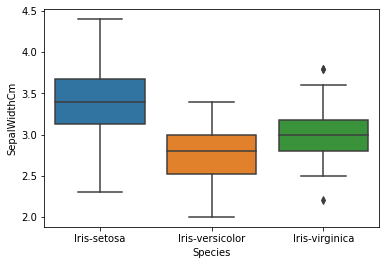

In [ ]:
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data=data)

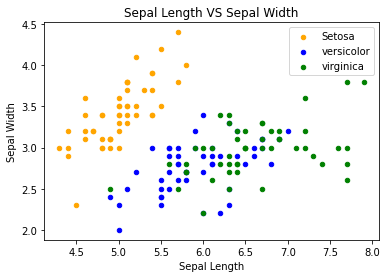

In [ ]:
#Sepal Length VS Sepal Width
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")
plt.show()

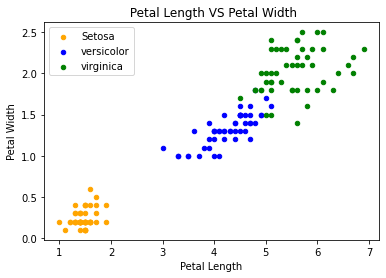

In [ ]:
#Petal Length VS Petal Width
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Petal Width")
plt.show()

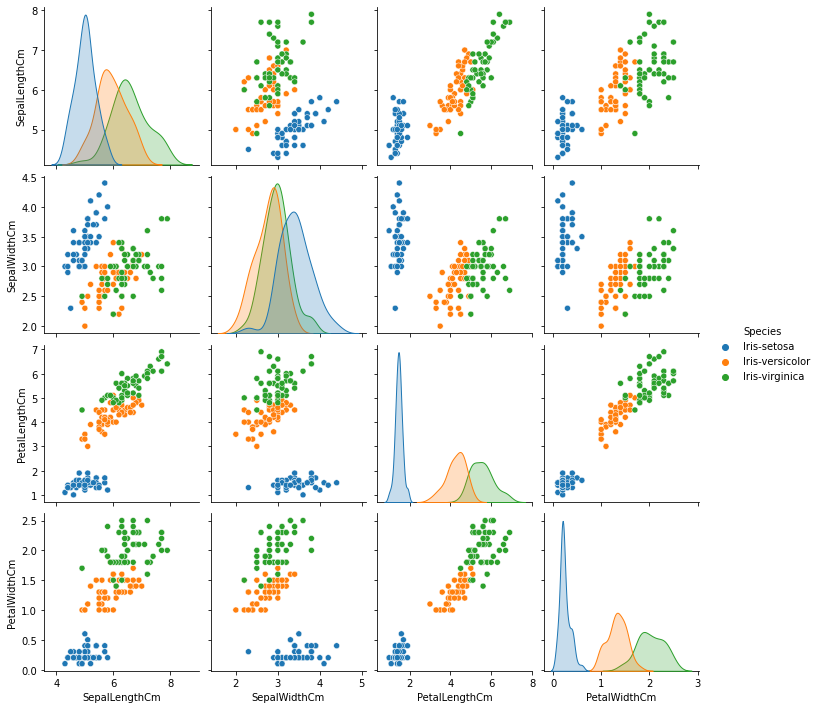

In [ ]:
sns.pairplot(data, hue = 'Species')       #A pairwise relationship in data

#Data Preprocessing or Correlation matrix

In [ ]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


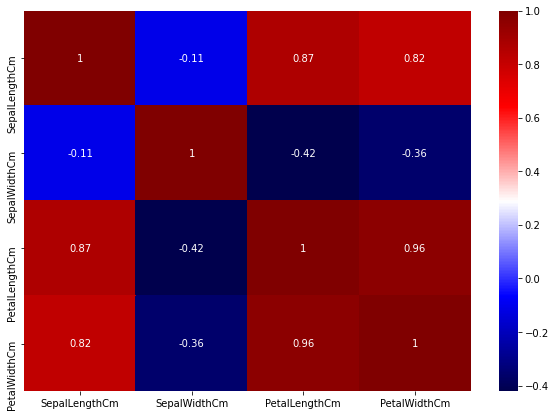

In [ ]:
plt.figure(figsize= (10,7))
sns.heatmap(data.corr(), annot=True, cmap = 'seismic')
plt.show()

#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['Species'] = le.fit_transform(data['Species'])     #returns encoding labels
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x = data.drop(columns = ['Species'])      #drop the target

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = data['Species']       #target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

#Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
tt = train_test_split
xtrain, xtest, ytrain, ytest = tt(x, y, test_size = 0.3, random_state = 0)

#Selecting Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

#Training and Evaluating model

In [ ]:
models = [lr, knn, svc, gnb, dtc, rfc]
scores = []

for model in models:
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  scores.append(accuracy_score(ytest, ypred))
  print("Accuracy of " + type(model).__name__+ ' is', accuracy_score(ytest, ypred))

Accuracy of LogisticRegression is 0.9777777777777777
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of SVC is 0.9777777777777777
Accuracy of GaussianNB is 1.0
Accuracy of DecisionTreeClassifier is 0.9777777777777777
Accuracy of RandomForestClassifier is 0.9777777777777777


#Accuracy by Confusion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(ytest, ypred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

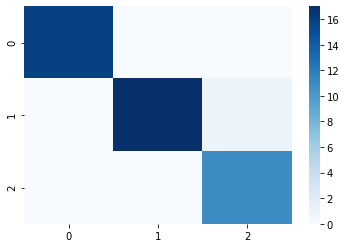

In [ ]:
sns.heatmap(cm, cmap = 'Blues')

#Plot Decision Tree

In [ ]:
from sklearn import tree

[Text(133.92000000000002, 195.696, 'X[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 65.232, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267

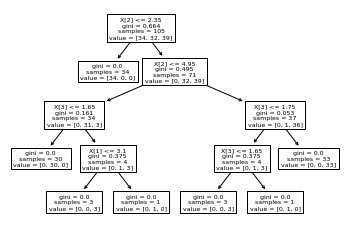

In [ ]:
tree.plot_tree(dtc)

In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [ ]:
Species_tree=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [ ]:
Species_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction=Species_tree.predict(xtest)

In [ ]:
print(prediction[0:5])
print(ytest[0:5])

[2 1 0 2 0]
114    2
62     1
33     0
107    2
7      0
Name: Species, dtype: int64


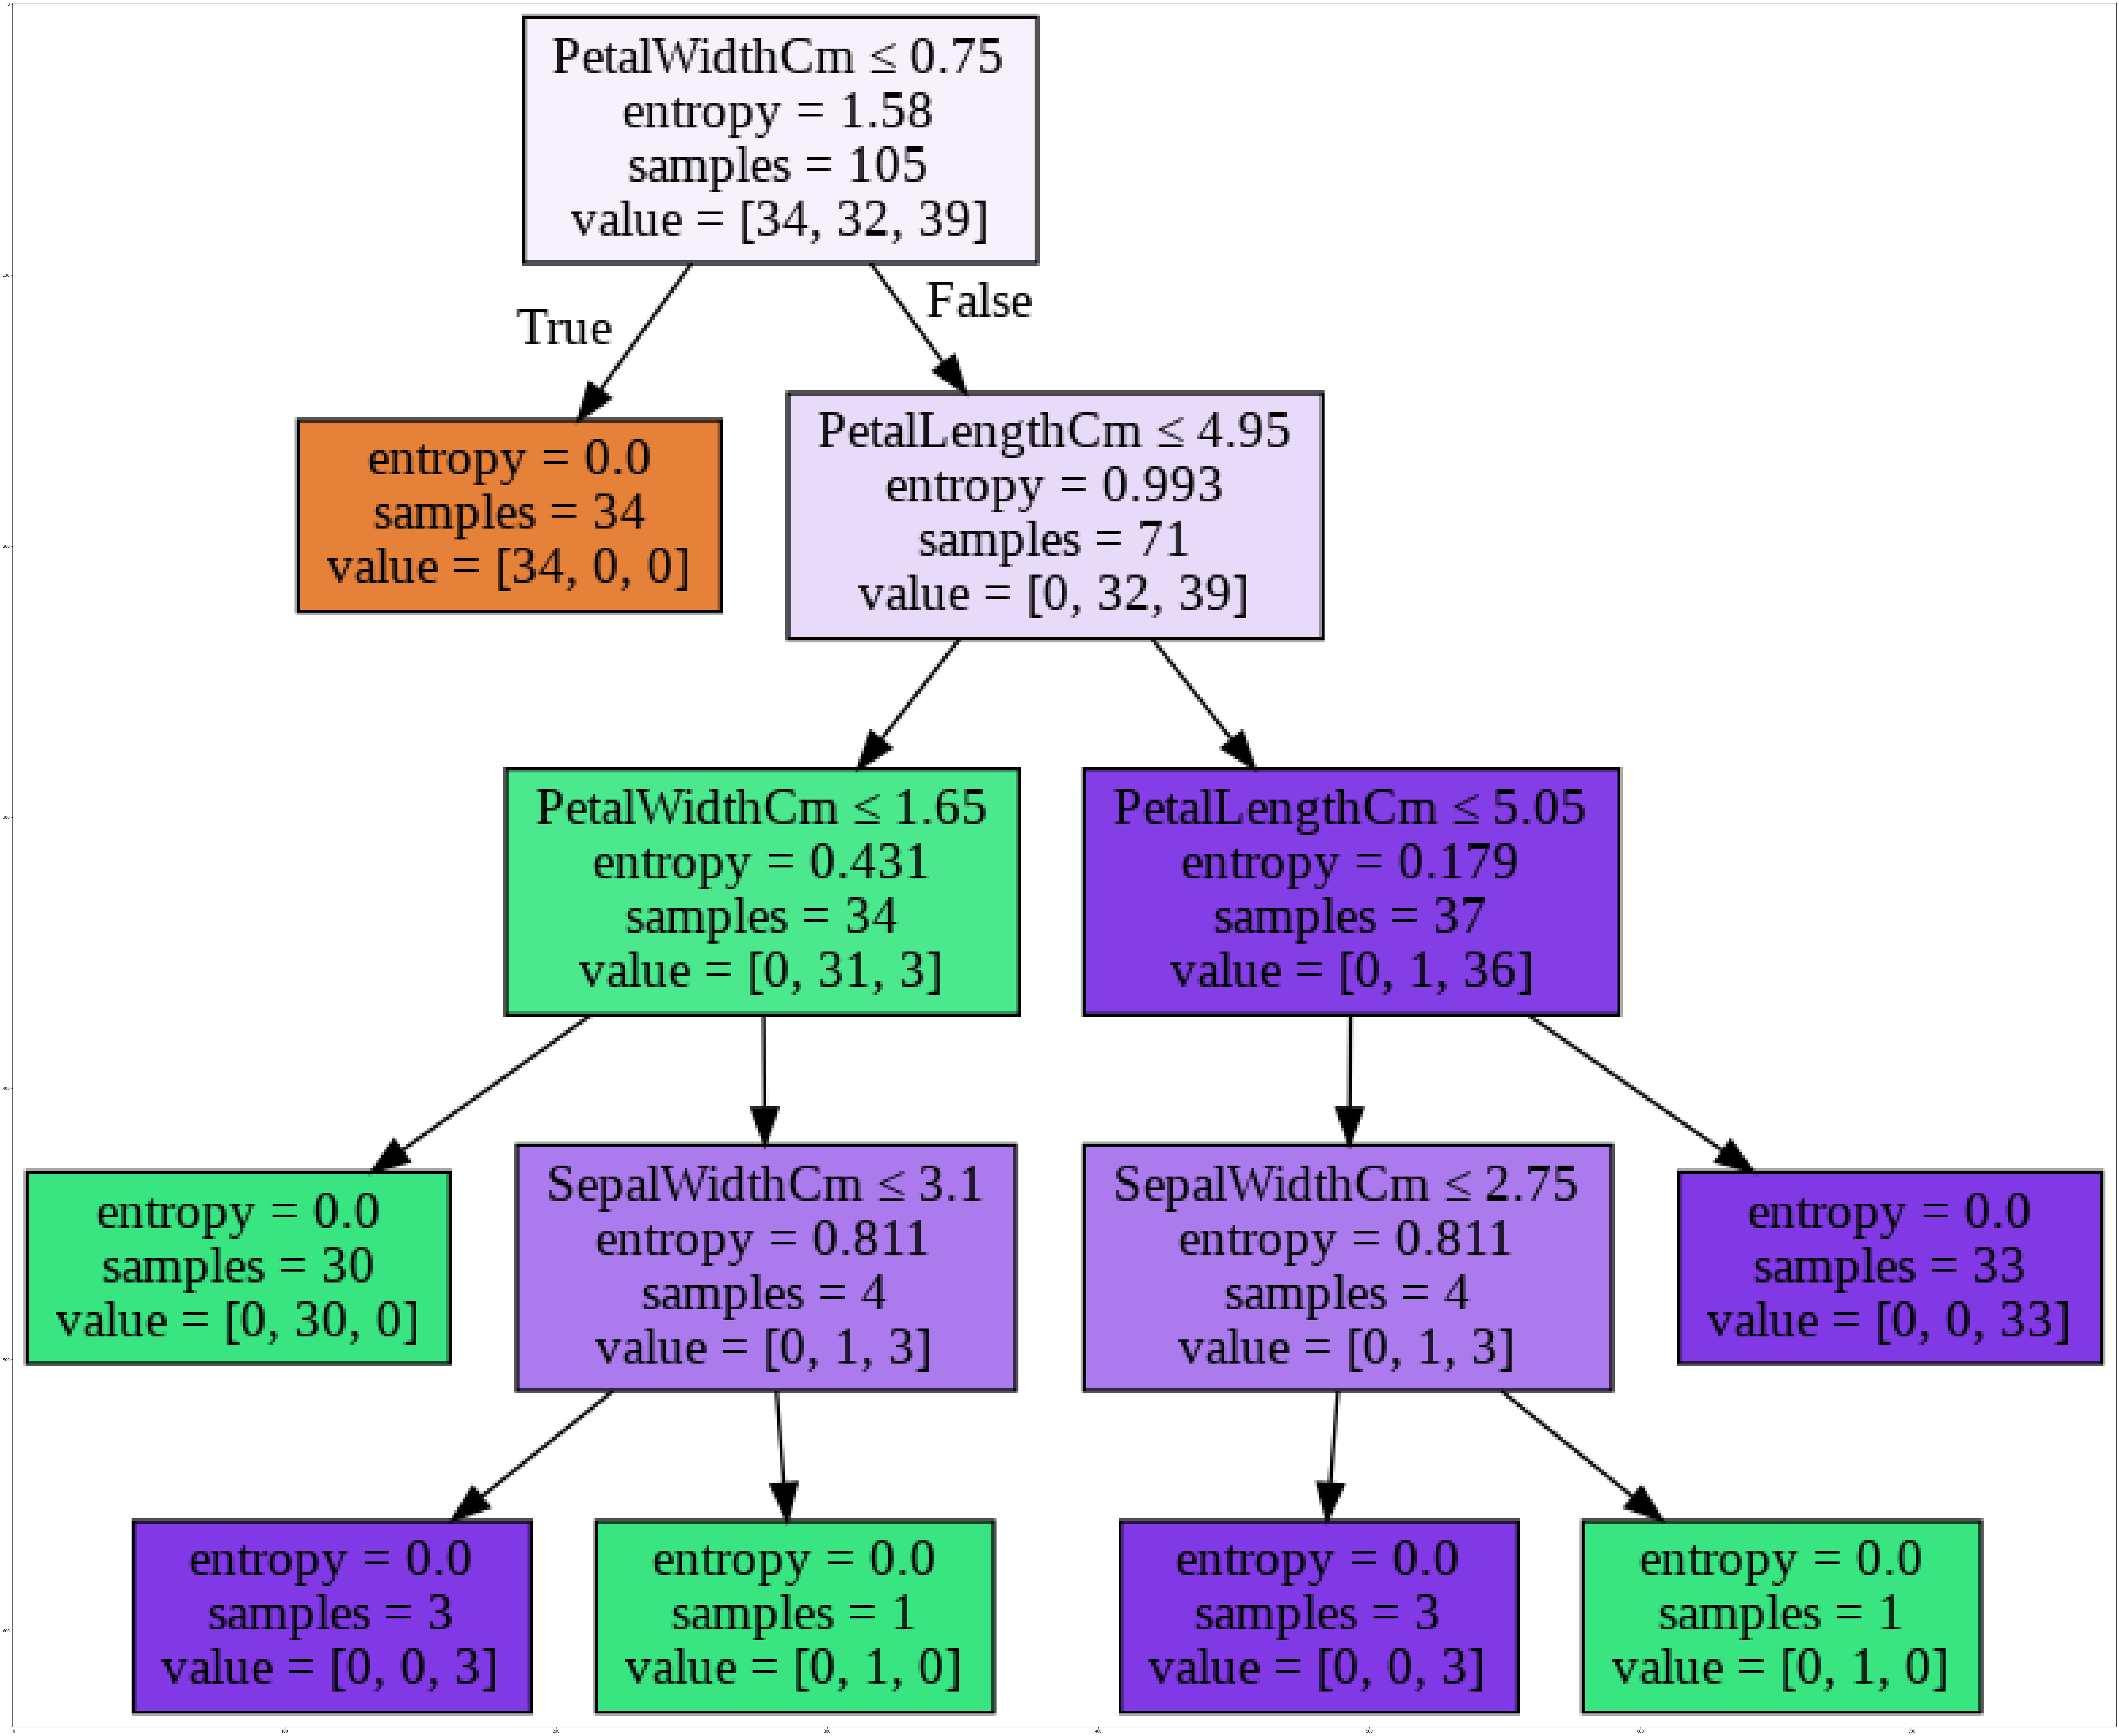

In [ ]:
#Printing the Decision Tree
dot_data = StringIO()
filename = "Speciestree.png"
featureNames = data.columns[0:4]
targetNames = data["Species"].unique().tolist()
out=tree.export_graphviz(Species_tree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

#Using Graphviz

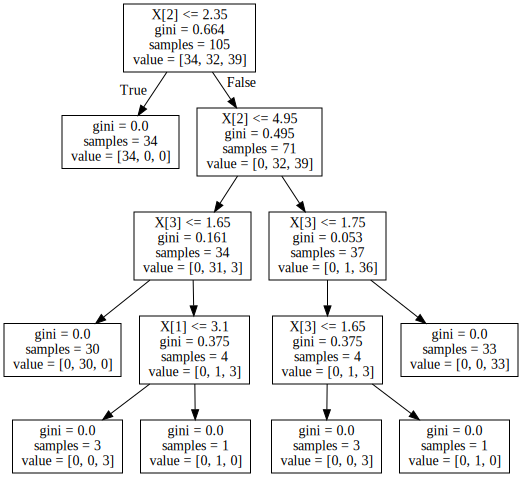

In [ ]:
import graphviz

dot_data = tree.export_graphviz(dtc, out_file = None)

graph = graphviz.Source(dot_data)
graph